In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [4]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data = np.asarray(train_df,dtype=np.float32)
test_data = np.asarray(test_df,dtype=np.float32)
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [7]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=.25,random_state=2345)

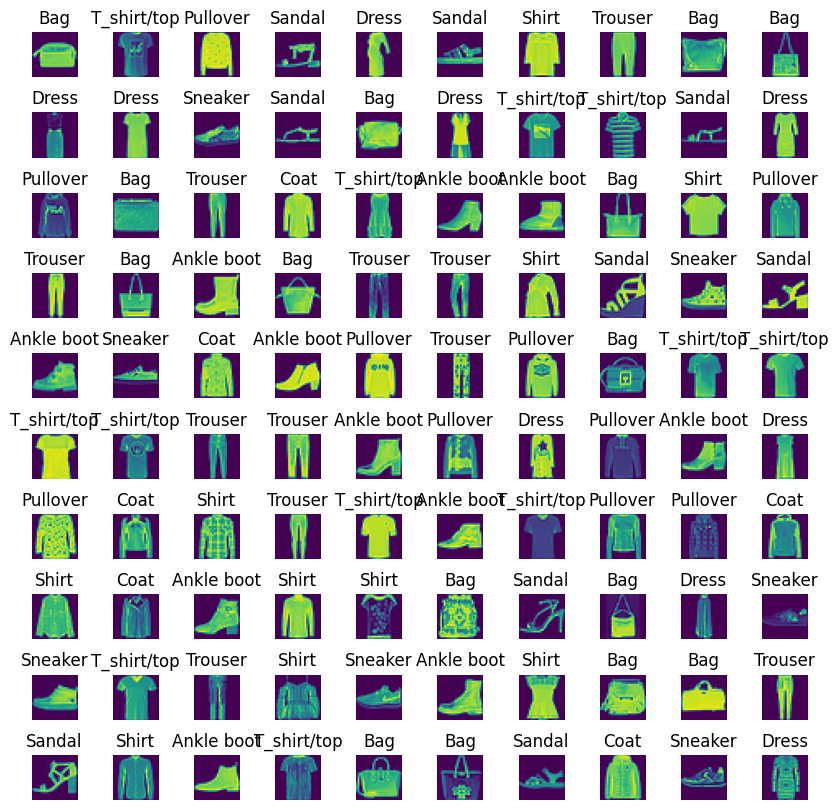

In [8]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.subplots_adjust(hspace=.7,wspace=0.8)
plt.show()

In [9]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_val = x_val.reshape(x_val.shape[0],28,28,1)
x_train.shape

(45000, 28, 28, 1)

In [10]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
])

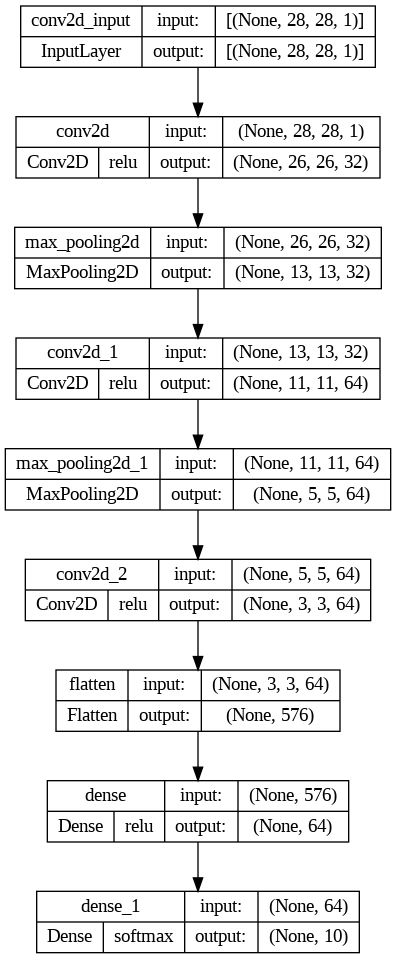

In [11]:
plot_model(model,show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [13]:
hist = model.fit(x_train,y_train,batch_size=6000,epochs=80,verbose=1,validation_data=(x_val,y_val))

Epoch 1/80
8/8 [==============================] - 59s 6s/step - loss: 2.2094 - accuracy: 0.3633 - val_loss: 1.9733 - val_accuracy: 0.4998
Epoch 2/80
8/8 [==============================] - 51s 6s/step - loss: 1.6307 - accuracy: 0.5886 - val_loss: 1.1145 - val_accuracy: 0.6407
Epoch 3/80
8/8 [==============================] - 51s 6s/step - loss: 0.9522 - accuracy: 0.6668 - val_loss: 0.8508 - val_accuracy: 0.7042
Epoch 4/80
8/8 [==============================] - 66s 8s/step - loss: 0.8138 - accuracy: 0.6980 - val_loss: 0.7867 - val_accuracy: 0.7153
Epoch 5/80
8/8 [==============================] - 54s 7s/step - loss: 0.7338 - accuracy: 0.7287 - val_loss: 0.6962 - val_accuracy: 0.7345
Epoch 6/80
8/8 [==============================] - 48s 6s/step - loss: 0.6687 - accuracy: 0.7497 - val_loss: 0.6505 - val_accuracy: 0.7609
Epoch 7/80
8/8 [==============================] - 48s 6s/step - loss: 0.6279 - accuracy: 0.7665 - val_loss: 0.6132 - val_accuracy: 0.7678
Epoch 8/80
8/8 [==================

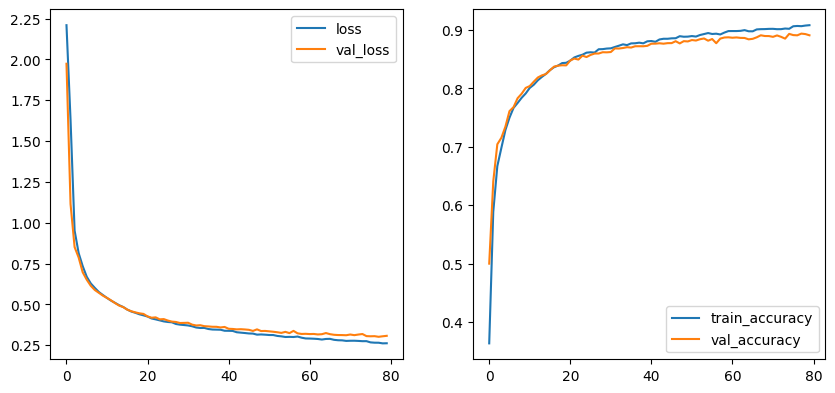

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

plt.subplot(222)
plt.plot(hist.history['accuracy'],label='train_accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [15]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2938
Test accuracy : 0.8940


In [16]:
predicted_prob = model.predict(x_test)
predicted_classes = np.argmax(predicted_prob,axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_classes,target_names=class_names))

313/313 [==============================] - 7s 20ms/step
              precision    recall  f1-score   support

 T_shirt/top       0.81      0.88      0.84      1000
     Trouser       0.97      0.98      0.98      1000
    Pullover       0.85      0.83      0.84      1000
       Dress       0.91      0.90      0.91      1000
        Coat       0.79      0.89      0.84      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.77      0.62      0.69      1000
     Sneaker       0.96      0.92      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.93      0.98      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



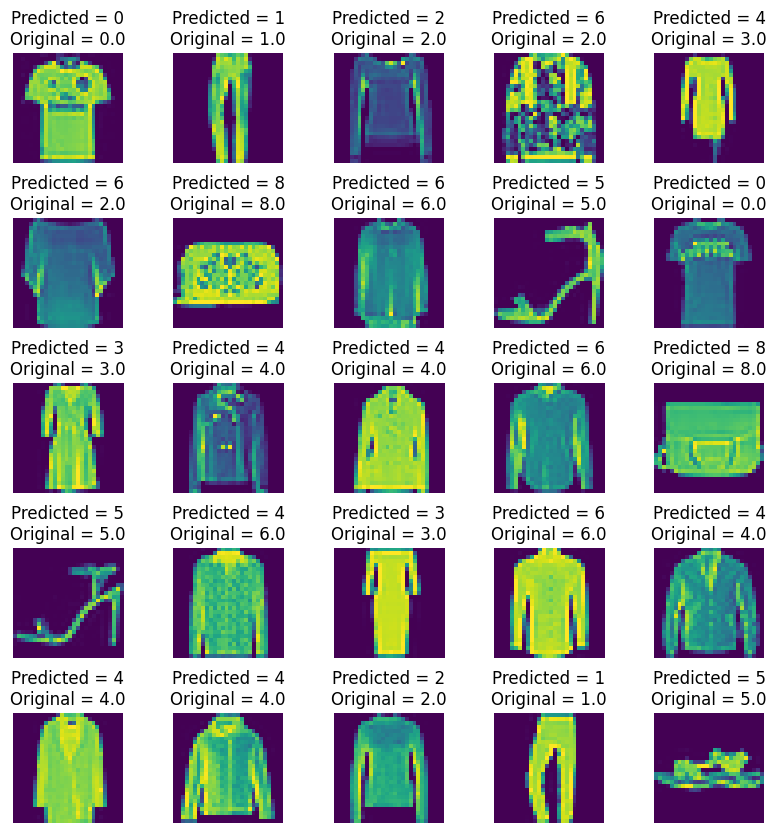

In [17]:
fig,axes = plt.subplots(5,5,figsize=(10,10))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Predicted = {predicted_classes[i]}\nOriginal = {y_test[i]}" )
    
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)